In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn
from scipy import arange
from scipy.signal import argrelextrema
import scipy.io as sio
from scipy.fftpack import fft, ifft
from statsmodels import api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pyplot import MultipleLocator
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [ ]:
def load_data() -> pd.DataFrame:

  df = pd.read_excel('d1.xlsx')
  df.columns = ['Date', 'NOx']
  df = df.dropna(subset=['NOx'])

  return df

In [ ]:
def fftTransfer(timeseries, n=10, fmin = 0.2):
  
  plt.subplot(211)
  x = np.arange(len(timeseries))  # x轴
  plt.plot(x, timeseries)
  plt.title('Original wave')
  
  yf = abs(fft(timeseries.values))
  yfnormlize = yf / len(timeseries)  # 归一化处理
  yfhalf = yfnormlize[range(int(len(timeseries) / 2))]  # 由于对称性，只取一半区间
  yfhalf = yfhalf * 2   # y 归一化

  xf = np.arange(len(timeseries))  # 频率
  xhalf = xf[range(int(len(timeseries) / 2))]  # 取一半区间

  plt.subplot(212)
  plt.plot(xhalf, yfhalf, 'r')
  plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')

  fwbest = yfhalf[argrelextrema(yfhalf, np.greater)]
  xwbest = argrelextrema(yfhalf, np.greater)
  plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
  plt.show(block=False)
  plt.show()

  xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
  # print('xorder = ', xorder)
  xworder = list()
  xworder.append(xwbest[x] for x in xorder)  # 返回频率从大到小的极值顺序
  fworder = list()
  fworder.append(fwbest[x] for x in xorder)  # 返回幅度


  if len(fwbest) <= n:
      fwbest = fwbest[fwbest >= fmin].copy()
      return len(timeseries)/xwbest[0][xorder[:len(fwbest)]]
  else:
      fwbest = fwbest[fwbest >= fmin].copy()
      # print(len(fwbest))
      # print(xwbest)
      return len(timeseries)/xwbest[0][xorder[:len(fwbest)]]

In [ ]:
data = load_data()
# data = data[data.Date < '20150130']
data = data.NOx.values

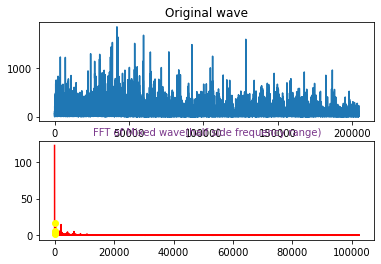

cycle =  [93.80614115490376, 656.0416666666666, 93.93529141808169, 94.23802946593001, 93.59167809785093, 109.39871726349546, 649.7936507936508, 93.50616719963453, 31.31655446756426, 328.5473515248796, 93.03863636363636, 46.95687084193622, 31.302186878727635, 93.29307201458523, 131.29249518922387, 109.69185423365488, 82.16981132075472, 31.268713718301253, 46.92457588262265, 92.74354327140915, 94.45546838947854, 389.13498098859316, 82.07097032878909, 92.65957446808511, 94.32488479262673, 93.12329390354869, 631.7438271604939, 92.57575757575758, 92.9119382660009, 645.6940063091482, 31.287832467135434, 94.1080459770115, 92.82766439909297, 82.00520833333333, 110.04569892473118, 46.8708495534692, 329.60547504025766, 109.04901438465636, 635.6677018633541, 540.065963060686, 94.89337042188224, 50.53950617283951, 31.25916310323763, 95.02553389043639, 598.4941520467836, 50.57697059550284, 81.84126349460216, 31.240079365079364, 641.6457680250784, 130.2896244430299, 92.40857787810384, 31.21149740774

In [ ]:
y = data
y = pd.Series(y).astype('float')
t = fftTransfer(y, n=5, fmin = 2)
p = []
for x in t:
  if x < 672:
    p.append(x)
print('cycle = ',p)